In [7]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

16000
Duration of the audio: 27.74 seconds


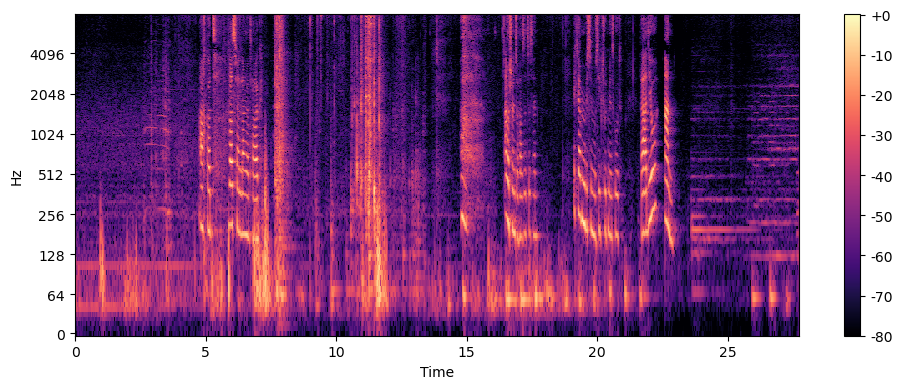

In [30]:
wav_path = "C:\\Users\\azatv\\Jupyter\\JupyterProjects\\ML and PC\\development_scenes\\wav\\scenes\\3_speech_true_Radio_an.wav"

y, sr = librosa.load(wav_path, sr=None)
print(sr)
n_fft = 2048  # Window size
hop_length = 512  # Hop length

# Compute the spectrogram
S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))

# compute to db
S_db = librosa.amplitude_to_db(S, ref=np.max)

# spectrogram
S_db_normalized = cv2.normalize(S_db, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

image = S_db_normalized.astype(np.uint8)


# Number of frames
num_frames = S.shape[1]

duration = (num_frames * hop_length) / sr

print(f"Duration of the audio: {duration:.2f} seconds")

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f')
plt.tight_layout()
plt.savefig('spectrogram_image.png')  
plt.show()

In [31]:
librosa.get_duration(y=y, sr=sr)

27.732

In [32]:
np.shape(S)

(1025, 867)

In [33]:
labels_csv = pd.read_csv(r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\development_scene_annotations.csv')
labels_csv.head()

,filename,command,start,end
0,2_speech_true_Ofen_aus,Ofen aus,11.25230,12.07747
1,3_speech_true_Radio_an,Radio an,21.48040,23.18083
2,4_speech_true_Alarm_an,Alarm an,14.45720,16.08301
3,16_speech_true_Fernseher_an,Fernseher an,6.15504,7.15586
4,19_speech_false_Lüftung_aus,Lüftung aus,8.45186,10.07722


In [34]:
start_time = labels_csv.iloc[1,2]
end_time = labels_csv.iloc[1,3]

In [35]:

start_f = start_time*sr/(hop_length)
end_f = end_time*sr/(hop_length)
print(f"starts at frame: {start_f} and ends at: {end_f}")

starts at frame: 671.2624999999999 and ends at: 724.4009375


In [36]:
import pandas as pd
import librosa
import sounddevice as sd
import numpy as np

data = {
    'filename': ['2_speech_true_Ofen_aus'],
    'command': ['Ofen aus'],
    'start': [start_time],
    'end': [end_time]
}

labels_csv = pd.DataFrame(data)

wav_path = "C:\\Users\\azatv\\Jupyter\\JupyterProjects\\ML and PC\\development_scenes\\wav\\scenes\\3_speech_true_Radio_an.wav"

y, sr = librosa.load(wav_path, sr=None)

hop_length = 512

start_f = start_time * sr / hop_length
end_f = end_time * sr / hop_length
print(f"Starts at frame: {start_f} and ends at: {end_f}")

start_sample = int(start_time * sr)
end_sample = int(end_time * sr)
print(f"Start sample: {start_sample} and End sample: {end_sample}")

segment = y[start_sample:end_sample]

sd.play(segment, sr)
sd.wait()  

Starts at frame: 671.2624999999999 and ends at: 724.4009375
Start sample: 343686 and End sample: 370893
